In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

## Litbank

In [2]:
dir_path = '../resources/litbank/coref/tsv'
titles = os.listdir(dir_path)
titles = [t for t in titles if t.endswith('.ann')]

In [3]:
counts = []
for title in titles:
    data = pd.read_csv(os.path.join(dir_path, title), sep='\t', header=None)
    data.columns = ['type', 'id', 'sent', 'token_start', 'sent2', 'token_end', 'text', 'tag', 'tag_type']
    data = data[data.type == 'MENTION']
    data = data[data.tag_type == 'PROP']
    counts.append(dict(data.groupby('tag').count()['type']))

In [4]:
print('PER', sum([c['PER'] for c in counts if 'PER' in c.keys()])/100)
print('GPE', sum([c['GPE'] for c in counts if 'GPE' in c.keys()])/100)
print('LOC', sum([c['LOC'] for c in counts if 'LOC' in c.keys()])/100)

PER 26.65
GPE 5.64
LOC 1.17


In [5]:
clusters = 0
entities_cluster = 0
entities = 0
for title in titles:
    data = pd.read_table(os.path.join(dir_path, title), header=None)
    data.columns = ['type', 'id', 'sent', 'token_start', 'sent2', 'token_end', 'text', 'tag', 'tag_type']
    clusters += len(data[data.type=='COREF'].groupby('sent').count()['type'])
    entities_cluster += np.mean(data[data.type=='COREF'].groupby('sent').count()['type'])
    entities += np.sum(data[data.type=='COREF'].groupby('sent').count()['type'])

print('Avg. # clusters per doc', clusters/100)
print('Avg. # entities per cluster', entities_cluster/100)
print('Avg. # entities per doc', entities/100)

Avg. # clusters per doc 72.35
Avg. # entities per cluster 4.558072717302165
Avg. # entities per doc 284.11


In [6]:
titles = os.listdir(dir_path)
titles = [t for t in titles if t.endswith('.txt')]
sentences = 0
for title in titles:
    with open(os.path.join(dir_path, title)) as f:
        text = f.read()
        sentences += len(text.split('\n'))-1
print("Avg. # sentences per doc", sentences/100)

Avg. # sentences per doc 85.6


## Protagonist Tagger v1

In [7]:
dir_path = '../data/testing_sets/test_person_gold_standard'
titles = os.listdir(dir_path)
entities = 0
sentences = 0
for title in titles:
    with open(os.path.join(dir_path, title)) as f:
        data = json.loads(f.read())
        entities += sum([len(d['entities']) for d in data])
        sentences += len(data)

print("Avg. # sentences per doc", sentences/len(titles))
print("Avg. # entities per doc", entities/len(titles))

Avg. # sentences per doc 100.0
Avg. # entities per doc 99.46153846153847


In [8]:
dir_path = '../data/lists_of_characters'
titles = os.listdir(dir_path)
protagonists = 0
for title in titles:
    k
    with open(os.path.join(dir_path, title)) as f:
        data = f.readlines()
        protagonists += len(data)
print("Avg. # protagonists per doc", protagonists/len(titles))

IsADirectoryError: [Errno 21] Is a directory: '../data/lists_of_characters/pride_and_prejudice_40'

In [ ]:
dir_path = '../data/testing_sets/test_names_gold_standard'
titles = os.listdir(dir_path)
entities = 0
sentences = 0
counts = []
for title in titles:
    with open(os.path.join(dir_path, title)) as f:
        data = json.loads(f.read())
        entities += sum([len(d['entities']) for d in data])
        sentences += len(data)
        counts += list(np.unique([e[2] for d in data for e in d['entities']], return_counts=True)[1])
print("Avg. # sentences per doc", sentences/len(titles))
print("Avg. # entities per doc", entities/len(titles))
print("Avg. # entities per protagonist", sum(counts)/len(counts))

## Protagonist Tagger v2

In [9]:
dir_path = '../data/testing_sets/test_person_gold_standard_corrected'
titles = os.listdir(dir_path)
entities = 0
sentences = 0
for title in titles:
    with open(os.path.join(dir_path, title)) as f:
        data = json.loads(f.read())
        entities += sum([len(d['entities']) for d in data])
        sentences += len(data)

print("Avg. # sentences per doc", sentences/len(titles))
print("Avg. # entities per doc", entities/len(titles))

Avg. # sentences per doc 100.0
Avg. # entities per doc 118.38461538461539


In [10]:
dir_path = '../data/lists_of_characters'
titles = os.listdir(dir_path)
protagonists = 0
for title in titles:
    with open(os.path.join(dir_path, title)) as f:
        data = f.readlines()
        protagonists += len(data)
print("Avg. # protagonists per doc", protagonists/len(titles))

IsADirectoryError: [Errno 21] Is a directory: '../data/lists_of_characters/pride_and_prejudice_40'

In [11]:
dir_path = '../data/testing_sets/test_names_gold_standard_corrected'
titles = os.listdir(dir_path)
entities = 0
sentences = 0
counts = []
lengths = []
for title in titles:
    with open(os.path.join(dir_path, title)) as f:
        data = json.loads(f.read())
        entities += sum([len(d['entities']) for d in data])
        sentences += len(data)
        counts += list(np.unique([e[2] for d in data for e in d['entities']], return_counts=True)[1])
        lengths += list([e[1]-e[0] for d in data for e in d['entities']])

print("Avg. # sentences per doc", sentences/len(titles))
print("Avg. # entities per doc", entities/len(titles))
print("Avg. # entities per protagonist", sum(counts)/len(counts))

Avg. # sentences per doc 100.0
Avg. # entities per doc 118.38461538461539
Avg. # entities per protagonist 8.274193548387096


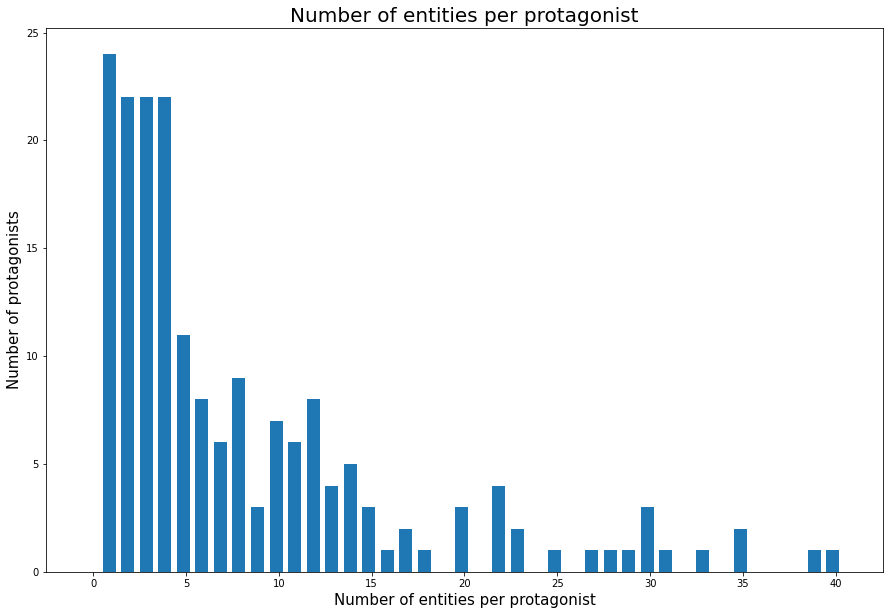

In [14]:
bins = np.arange(0, max(counts) + 1.5) - 0.5
fig, ax = plt.subplots(figsize=(15,10))
_ = ax.hist(counts, bins=bins, width=0.7)
ax.set_xticks(bins[::5] + 0.5)
plt.xlabel('Number of entities per protagonist',  fontsize=15)
plt.ylabel('Number of protagonists',  fontsize=15)
plt.title('Number of entities per protagonist', fontsize=20)
plt.savefig('histogram_entities_per_protagonist.png')

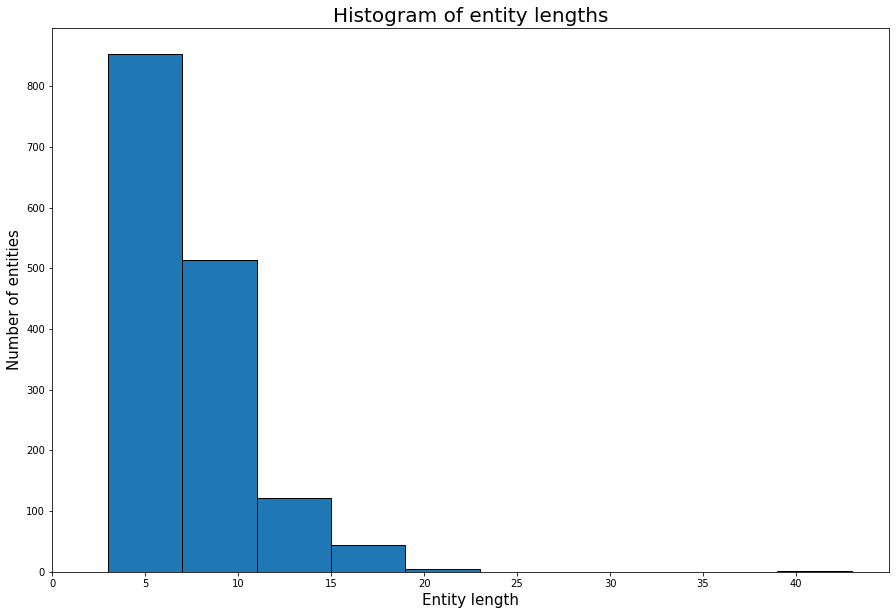

In [261]:
fig, ax = plt.subplots(figsize=(15,10))
_ = ax.hist(lengths, bins=10, edgecolor='black')
ax.set_xticks(bins[::5] + 0.5)
plt.xlabel('Entity length',  fontsize=15)
plt.ylabel('Number of entities',  fontsize=15)
plt.title('Histogram of entity lengths', fontsize=20)
plt.savefig('histogram_entities_length.png')

## Pride and Prejudice

In [183]:
data = pd.read_csv('/home/airi/Downloads/resolved.tsv', sep='\t')

In [204]:
np.mean(data.groupby('CHARACTER').count()['SPAN'])

168.55395683453239

In [203]:
data.shape

(23429, 6)